In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# we can turn off warnings like the one seen above
# not recommended in production. Turning off for the sake of getting rid of it.
import warnings
warnings.filterwarnings("ignore") # never print matching warnings

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [4]:
automobile_df = pd.read_csv('../datasets/auto-mpg-processed.csv')

In [5]:
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,35.0,4,72.0,69,1613,18.0,49
1,26.0,4,98.0,90,2265,15.5,47
2,23.7,3,70.0,100,2420,12.5,40
3,33.0,4,105.0,74,2190,14.2,39
4,30.5,4,98.0,63,2051,17.0,43


In [6]:
result_dict = {}

In [7]:
#  helper function
def build_model(regression_fn,
               name_of_y_col,
               names_of_x_col,
               dataset,
               test_frac =0.2,
               preprocess_fn =None,
               show_plot_Y=False,
               show_plot_scatter=False):
    X =dataset[names_of_x_col]
    Y =dataset[name_of_y_col]
    
    x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.2)
    
    model = regression_fn(x_train,y_train)
    y_pred = model.predict(x_test)
    
    print("Training Score : ",model.score(x_train,y_train))
    print("Test Score     : ",r2_score(y_test,y_pred))
    
    if show_plot_Y==True:
        fig,ax = plt.subplots(figsize=(12,8))
        plt.plot(y_pred,label='Predicted')
        plt.plot(y_test.values,label = "Actual")
        
        plt.ylabel(name_of_y_col)
        
        plt.legend()
        plt.show()
    if show_plot_scatter==True:
        #will work only if single feature is used for training
        fig,ax =plt.subplots(figsize=(12,8))
        plt.scatter(x_test,y_test)
        plt.plot(x_test,y_pred,'o')
        
        plt.legend()
        plt.show()
    return {
        "Training_Score": model.score(x_train,y_train),
        "Test_Score": r2_score(y_test,y_pred)
    }

In [8]:
def compare_results():
    for key in result_dict:
        print("Regression    :",key)
        print("Training Score:",result_dict[key]['Training_Score'])
        print("Test Score    :",result_dict[key]['Test_Score'])
        print()

In [9]:
def linear_reg(x_train,y_train):
    model = LinearRegression(normalize=True)
    model.fit(x_train,y_train)
    
    return model

Training Score :  0.6974668695773589
Test Score     :  0.6643979801055702


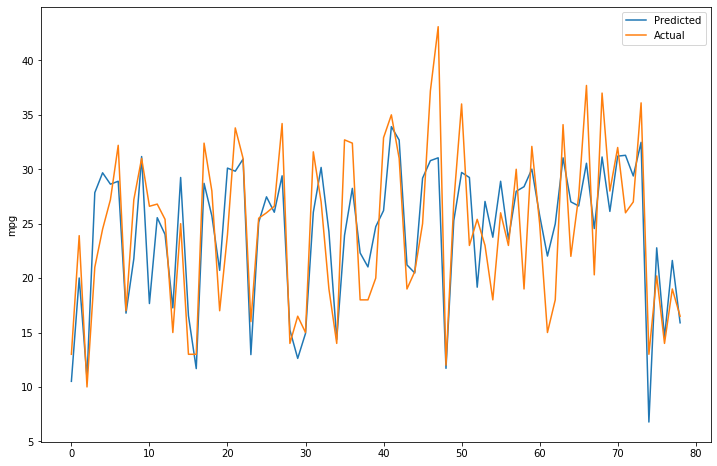

In [10]:
result_dict['single_linear'] = build_model(linear_reg,'mpg',
                                          ['weight'],
                                          automobile_df,
                                          show_plot_Y=True)

Training Score :  0.7188605627621198
Test Score     :  0.6508635040006403


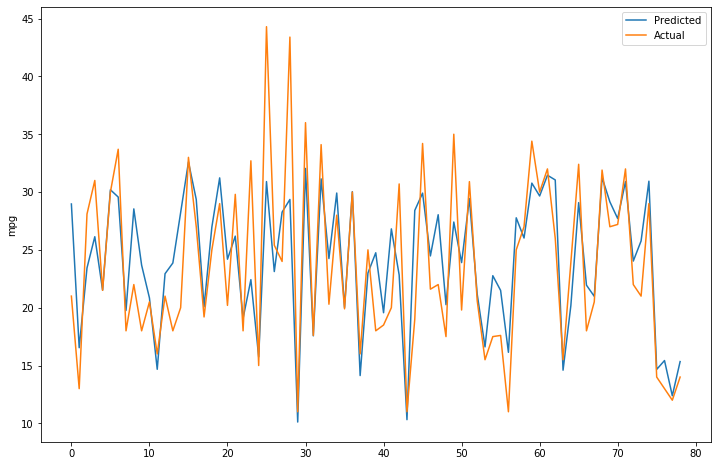

In [11]:
result_dict['kitchen_sink_linear'] = build_model(linear_reg,'mpg',
                                          ['weight','cylinders',
                                          'displacement',
                                          'horsepower','acceleration'],
                                          automobile_df,
                                          show_plot_Y=True)

Our kitchen sink regression performed decently well this time around, training score of 70%, test score of around the same. But you don't really need to throw the kitchen sink at your linear regressor, you'll find that a more parsimonious regression with a few selected features performs just as well. 

Training Score :  0.6990223976396464
Test Score     :  0.7257012200251526


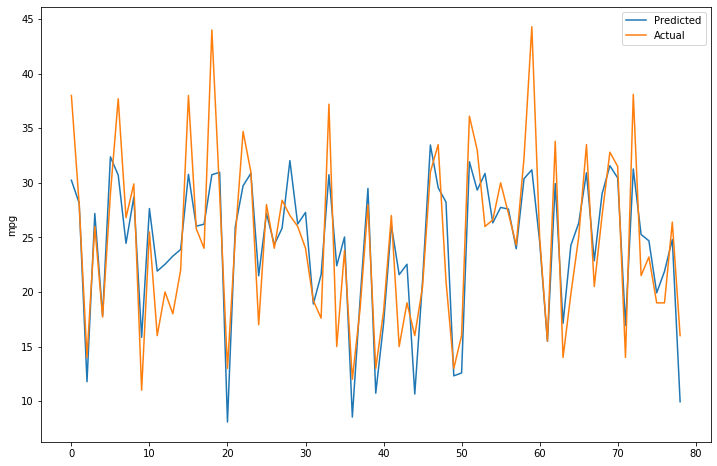

In [12]:
result_dict['parsimonious_linear'] = build_model(linear_reg,'mpg',
                                          ['weight',
                                          'horsepower'],
                                          automobile_df,
                                          show_plot_Y=True)

Here is a parsimonious regression using the same linear regressor estimator object, we'll only use the horsepower and weight features in our training data. We've dropped the number of features down from five to two, but because these were the most significant features, we see that the training score and test scores for our regression are still high. Now, using five columns versus two columns when our dataset is small may not make much of a difference, but imagine if you had a dataset with millions of records. Going from five columns down to two might save you huge amounts of time during training. 


Now that we've performed linear regression using a single feature, the kitchen sink regression and finally a parsimonious regression, let's compare results and here are all of the training and testing scores for all of the regression models that we've just built and trained right here for you, set up side by side. This one screen allows us to quickly compare how the different models have done.

In [13]:
compare_results()

Regression    : single_linear
Training Score: 0.6974668695773589
Test Score    : 0.6643979801055702

Regression    : kitchen_sink_linear
Training Score: 0.7188605627621198
Test Score    : 0.6508635040006403

Regression    : parsimonious_linear
Training Score: 0.6990223976396464
Test Score    : 0.7257012200251526



# LASSO REGRESSION

- An important hyperparameter that you specify when you build your lasso regression model is alpha. Alpha is the constant that you use to multiply the L-1 regularization term. The default value for alpha is set to 1, and higher values of alpha imply more regularization. 



- If you set alpha to 0, this completely eliminates the L-1 penalty term, which means Lasso regression defaults to ordinary linear regression, least squares regression. 



- The way lasso regression is implemented behind the scenes in scikit-learn, for numerical reasons this estimator should not be used with alpha equal to 0, something for you to watch out for. 



- In order to perform ordinary least squares regression, simply use the LinearRegression estimator object. Let's build and train a lasso regression model by calling the build_model function. 

In [14]:
def lasso_reg(x_train,y_train,alpha=0.5):
    model = Lasso(alpha=alpha)
    model.fit(x_train,y_train)
    
    return model

Training Score :  0.6941280798407706
Test Score     :  0.7379048700461255


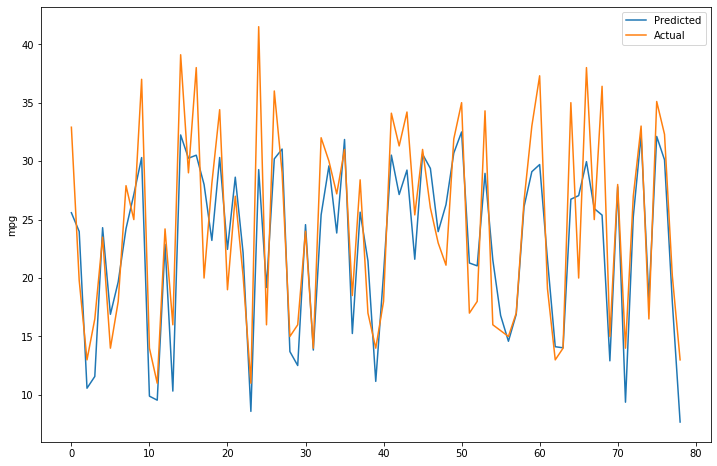

In [15]:
result_dict['Lasso_Regression'] = build_model(lasso_reg,'mpg',
                                             ['horsepower','acceleration',
                                             'weight','cylinders','displacement'],
                                             automobile_df,
                                             show_plot_Y=True)

This is a kitchen sink regression, as you can see, I've passed in all five features here. We've seen just a little bit earlier that kitchen sink models with linear regression don't really perform well, but if you take a look at the training and test R squares for lasso regression, you'll find something interesting. 

You'll find that the model performs better on the test data with a test score of almost 73%. Lasso regression models are regularized. The penalty that we've imposed, the L-1 penalty, force model coefficients to be smaller in magnitude. This results in a simpler and more robust model, which performs well on test data. 

So if you're performing kitchen sink regression because you don't know which features in your data are significant, it's better to use a regularized model. 

Let's quickly call the compare_results function here in order to see all of the training and test scores in one place. 

In [16]:
compare_results()

Regression    : single_linear
Training Score: 0.6974668695773589
Test Score    : 0.6643979801055702

Regression    : kitchen_sink_linear
Training Score: 0.7188605627621198
Test Score    : 0.6508635040006403

Regression    : parsimonious_linear
Training Score: 0.6990223976396464
Test Score    : 0.7257012200251526

Regression    : Lasso_Regression
Training Score: 0.6941280798407706
Test Score    : 0.7379048700461255



You can see that the kitchen sink linear regression didn't really perform as well as the kitchen sink lasso regression. 

The R square for test data was almost 73% for our regularized model, whereas it was just around 70% for our non-regularized linear regression model.

# RIDGE REGRESSION

The ridge regression model is another one that imposes a penalty on an overly complex model by using regularization. 

Ridge regression works exactly like lasso regression, it reduces the magnitude of regression coefficients by adding L-2 regularization in the loss function. 

The L-2 regularization term is the L-2 Norm of the coefficients, which is the sum of the squares of the coefficients which we use to add as a penalty. 

In [17]:
def ridge_reg(x_train,y_train,alpha=0.5,normalize=True):
    model = Ridge(alpha=alpha,normalize=normalize)
    model.fit(x_train,y_train)
    
    return model

The alpha parameter here is used to determine the strength of the regularization. This should be a positive floating point value, larger values imply stronger or greater regularization. 

Once again, because this is a regularized regression model, we'll perform kitchen sink ridge regression. 

We'll throw in all features here and see how kitchen sink regression performs using the ridge regularized model. 

Training Score :  0.6775079791275019
Test Score     :  0.665957051250408


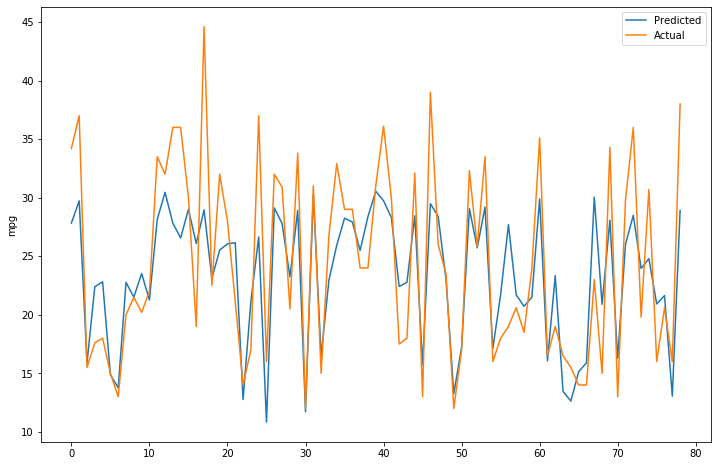

In [18]:
result_dict['Ridge_Regression'] = build_model(ridge_reg,'mpg',
                                             ['horsepower','acceleration',
                                             'weight','cylinders','displacement'],
                                             automobile_df,
                                             show_plot_Y=True)

And you can see here from the training R square and the test R square that this particular model didn't really perform well for this dataset. 

In [19]:
compare_results()

Regression    : single_linear
Training Score: 0.6974668695773589
Test Score    : 0.6643979801055702

Regression    : kitchen_sink_linear
Training Score: 0.7188605627621198
Test Score    : 0.6508635040006403

Regression    : parsimonious_linear
Training Score: 0.6990223976396464
Test Score    : 0.7257012200251526

Regression    : Lasso_Regression
Training Score: 0.6941280798407706
Test Score    : 0.7379048700461255

Regression    : Ridge_Regression
Training Score: 0.6775079791275019
Test Score    : 0.665957051250408



I'll now call compare_results for us to quickly take a look at how this model performed against other models that we had trained earlier. 
For this particular dataset, the lasso model regularized using L-1 Norm performed better than the ridge regression model. 

Remember that this in no way implies that in absolute terms one regression model is better than the other, 
 - it depends on your dataset, 
 - it depends on other model parameters, 
which we haven't really tweaked here. 

Both lasso and ridge are regularized models, which impose a penalty on more complex models or higher value of coefficients. 

The penalty that they impose whether it's the L-1 Norm or the L-2 Norm of coefficients is what is different.

# ELASTICNET

 The lasso regression model uses the L-1 Norm of coefficients as its penalty function, the ridge regression model uses the L-2 Norm. And the elastic net regression model combines both lasso and ridge regression. 
 
The elastic net model that we're going to implement here in this demo reduces the magnitude of regression coefficients by applying both L-1, as well as L-2 regularization. 

In what combination you want to combine L-1, as well as L-2 regularization is up to you, it's a parameter you can tweak. 


In [20]:
def elastic_net_reg(x_train,y_train, alpha=1, l1_ratio=0.5,
                   normalize=False,max_iter=10000,warm_start=True,
                    equivalent_to = "Elastic Net"):
    
    print("Equivalent to:",equivalent_to)
    
    model = ElasticNet(alpha=alpha,l1_ratio=l1_ratio,
                       normalize=normalize,max_iter=max_iter,
                      warm_start=warm_start)
    model.fit(x_train,y_train)
    
    return model

Let's study some of the parameters that we have here that go into our elastic net model. The first is the alpha parameter that determines the strength of the regularization.

Alpha is a constant that you use to multiply the penalty terms in your loss function; the default value for alpha is 1. 

The l1_ratio is what is called the elastic net mixing parameter. This is the ratio that you tweak in order to determine in what combination you want to apply L-1 regularization and L-2 regularization. 

If L-1 ratio is equal to 0, that is completely an L-2 penalty. An L-1 ratio of 0 implies ridge regression where you use the L-2 Norm of your coefficients as the penalty function. 


An l1_ratio of 1 swings to the other end, that is lasso regression where you use the L-1 Norm of your coefficients as the penalty function. 


We've chosen an l1_ratio of 0.5 here to get a mix of L-1, as well as L-2 regularization. 


We set normalize to False and run this model for a maximum number of 100, 000 iterations. 


When I worked on this particular dataset, I found that 100,000 iterations gave me decent results. 

try this on your own with lower values of max_iter and you'll find that the results are not as good. 


When you're working with data in the real world with thousands, maybe millions of records, you should normalize your data, but for this toy dataset you'll find that even with normalized False, we do just fine. 


The other parameters here which we have here, warm_start is equal to True. 

If you want your model to have a warm start, that is if you want your model to reuse the solution of the previous call made to fit this model as the initialization for the next step, you'll set warm_start to True. 

If you want to erase all previous solutions and start afresh, you'll set warm_start to False. You'll find that a number of different models in scikit-learn's library accept the warm_start parameter. 


The equivalent_to parameter is something that I'm going to pass in in order to understand what this elastic net model is equivalent to. This is something that we explicitly pass in when we invoke this function. 

We first print out what this model is equivalent to, then instantiate the ElasticNet regressor with the parameters that we passed in and call fit on the model to start training. 



In [21]:
from functools import partial

Now in order to tweak the value of the parameters that I pass into my regression function, I'm going to use this partial function available in Python. 

This allows me to partially specify the parameters for a particular function. 

Now I'm going to build and train an elastic net model and I'm going to set the model parameter such that it performs ordinary least squares regression.

Observe a partial specification of the parameters to the elastic net regression function. 


When you set alpha to 0, it means that no penalty will be imposed while training our model. This is equivalent to simple linear ordinary least squares regression. 

Now, the way elastic net is implemented in scikit-learn's library, this will trigger a convergence warning when you try to implement OLS using the ElasticNet estimator. This is not really recommended. If you want to perform OLS, use the LinearRegression estimator object. 

Let's go ahead and run this anyway; this is a kitchen sink elastic net regression, the equivalent of OLS. 


Equivalent to: OLS
Training Score :  0.7027540181914935
Test Score     :  0.7172191004827578


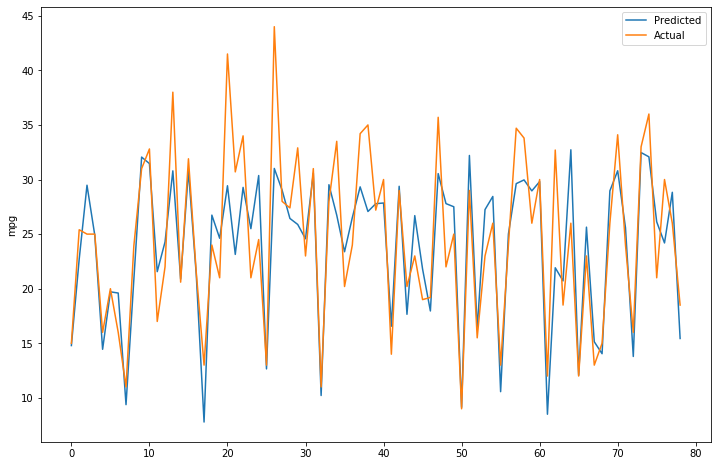

In [41]:
result_dict['kitchen_sink_elasticnet_ols'] = build_model(partial(elastic_net_reg,
                                                            alpha=0,equivalent_to='OLS'),
                                                    'mpg',['cylinders','displacement',
                                                          'horsepower','weight','acceleration'],
                                                    automobile_df,show_plot_Y=True)

We get a training score and a test score, but the convergence warning is hidden here because we're ignoring warnings. 

That's the specification we gave up front before we started this notebook. 

Let's run elastic net regression once again, but this time we specify l1_ratio equal to 1; this is the equivalent of lasso regression. 

The multiplier for our penalty terms alpha is set to 1. This is a regularized model, the equivalent of Lasso regression, I'm going to pass in all of my features for kitchen sink regression. 

Equivalent to: Lasso
Training Score :  0.7004707656840152
Test Score     :  0.7338833738047023


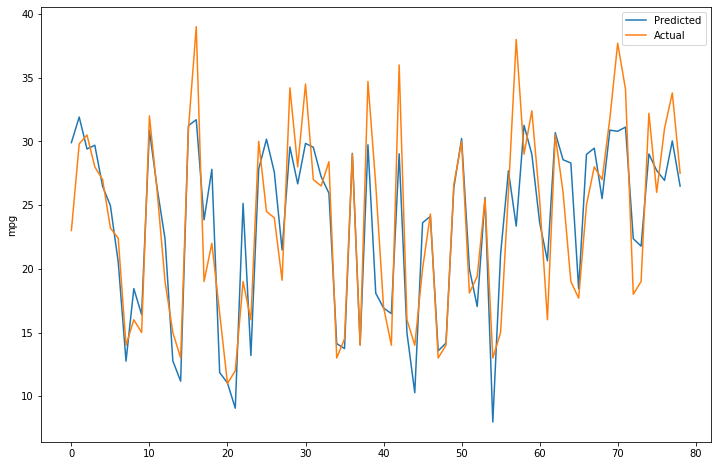

In [36]:
result_dict['kitchen_sink_elasticnet_lasso'] = build_model(partial(elastic_net_reg,l1_ratio=1,
                                                            alpha=1,equivalent_to='Lasso'),
                                                    'mpg',['cylinders','displacement',
                                                          'horsepower','weight','acceleration'],
                                                    automobile_df,show_plot_Y=True)

And just like our lasso regression model did well earlier, the elastic net model with l1_ratio equal to 1 also does well. The R square score on the test data is 73%. 

Let's run elastic net regression once again, this time we set the l1_ratio to be equal to 0, so elastic net performs the equivalent of ridge regression with just L-2 regularization. 

Equivalent to: Lasso
Training Score :  0.7092733275415619
Test Score     :  0.6961370680797261


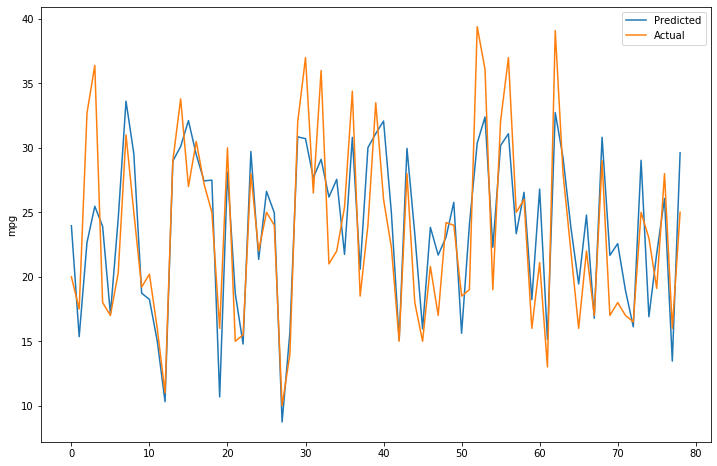

In [42]:
result_dict['kitchen_sink_elasticnet_ridge'] = build_model(partial(elastic_net_reg,l1_ratio=0,
                                                            alpha=1,equivalent_to='Lasso'),
                                                    'mpg',['cylinders','displacement',
                                                          'horsepower','weight','acceleration'],
                                                    automobile_df,show_plot_Y=True)

Once again, this is a kitchen sink regression with all of our features, and you can see that ridge regression also performs reasonably well on our dataset. 

But if you're using elastic net as your regression model, what you really want is the ability to control how much L-1 regularization and how much L-2 regularization should be applied to your model. 

Here I specify a ratio of 0.5 for both kinds of regularization, 

Equivalent to: Lasso
Training Score :  0.6947204372833713
Test Score     :  0.7511351747895165


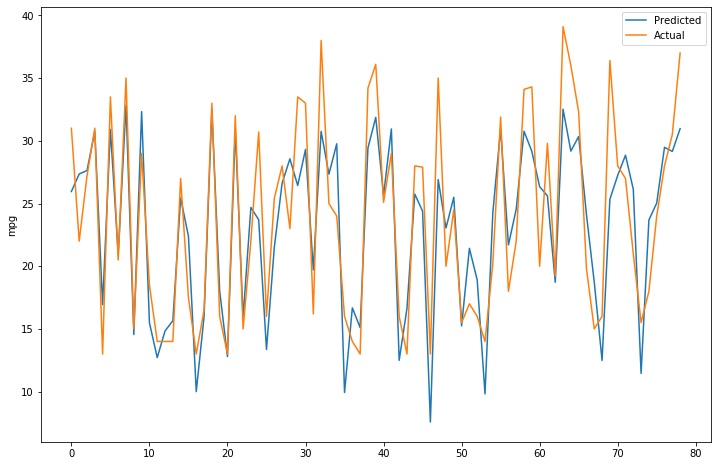

In [45]:
result_dict['kitchen_sink_elasticnet'] = build_model(partial(elastic_net_reg,l1_ratio=0.5,
                                                            alpha=1,equivalent_to='Lasso'),
                                                    'mpg',['cylinders','displacement',
                                                          'horsepower','weight','acceleration'],
                                                    automobile_df,show_plot_Y=True)

Here is what my elastic net scores look like. 

Both training and test scores are high, test scores are higher than the training score, indicating that this is a fairly robust model. 

If you've forgotten what the results of the previous runs were, you can always call compare_results in order to view results across all regression models.

In [46]:
compare_results()

Regression    : single_linear
Training Score: 0.6974668695773589
Test Score    : 0.6643979801055702

Regression    : kitchen_sink_linear
Training Score: 0.7188605627621198
Test Score    : 0.6508635040006403

Regression    : parsimonious_linear
Training Score: 0.6990223976396464
Test Score    : 0.7257012200251526

Regression    : Lasso_Regression
Training Score: 0.6941280798407706
Test Score    : 0.7379048700461255

Regression    : Ridge_Regression
Training Score: 0.6775079791275019
Test Score    : 0.665957051250408

Regression    : kitchen_sink_elasticnet_ols
Training Score: 0.7027540181914935
Test Score    : 0.7172191004827578

Regression    : kitchen_sink_elasticnet_lasso
Training Score: 0.7004707656840152
Test Score    : 0.7338833738047023

Regression    : kitchen_sink_elasticnet_ridge
Training Score: 0.7092733275415619
Test Score    : 0.6961370680797261

Regression    : kitchen_sink_elasticnet
Training Score: 0.6947204372833713
Test Score    : 0.7511351747895165

